# Homework 11 | AE 771
### Jack House | May 2020

#### Please solve the problems on the following worksheet. In the worksheet, Figure 4.6 refers to Figure 4.7 in the 9th edition. 
- Recreate Figure 5.4. This figure is in the handout notes for staging. It is not textbook Figure 5.4. 
- Also, calculate the delta_V from the staging handout (second attachment) for both Single Stage and Two Stage. 

#### This is due Monday 5/4 at 11:59pm CT.


In [2]:
#Python Initiation
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
import pandas as pd
import ipywidgets as widgets
import time
import math
from IPython.display import display

#Graph Formatting
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
Res=100 #Resoultion of the calulations

#Graph Font Edit
font = {'family':'Times New Roman',
        'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)


## -Question 1

- a) Reproduce curves of figure 5.4
- b) Calculate the "orbital velocity" and "escape velocity" at 200 and 2150 statute miles altitude above the earth
- c) Calculate the orbit altitude for "geostationary" or "geo-synchronous" satellites
- NOTE: Assume earth's mean radius= 4,000 miles

A) Plot of Figure 5.4


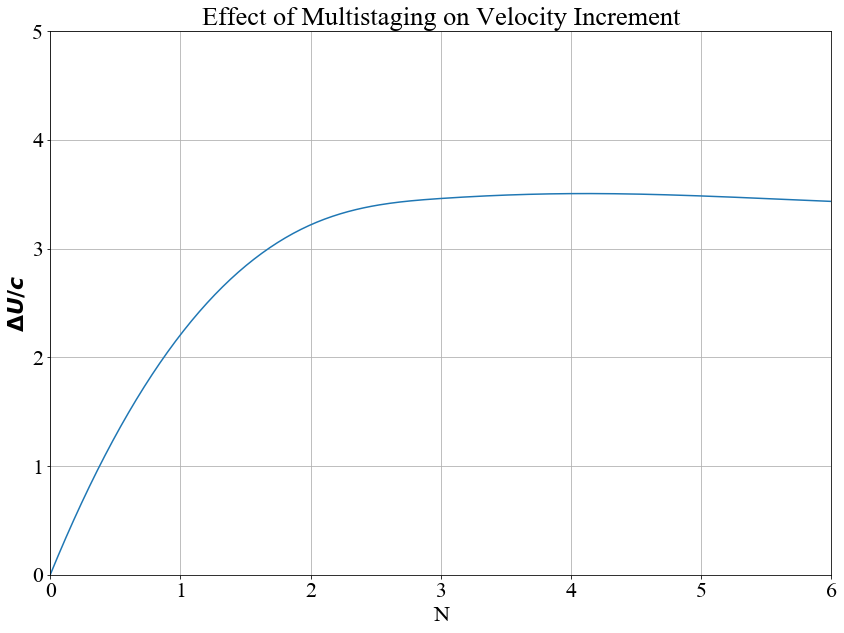

For a Altitude of 200 miles:
	Orbital Velocity: 10.9 km/s or 35777.49 ft/s
	Escape Velocity: 7.71 km/s or 25298.51 ft/s
For a Altitude of 2150 miles:
	Orbital Velocity: 9.0 km/s or 29525.87 ft/s
	Escape Velocity: 6.36 km/s or 20877.95 ft/s
C) The Orbit Altitude for Geostationary Satellites is 22199.33 miles or 35718.72 km


In [32]:
#Part A |
print('A) Plot of Figure 5.4')

n = np.linspace(0.0001,6,7)
s1 = 0.1  #Structural Fraction
lo = 0.01 #Payload Fraction Overall
Δu_c = n*np.log(1/((s1+lo**(1/n))))
from scipy.interpolate import make_interp_spline, BSpline
xnew = np.linspace(n.min(), n.max(), 300) 
spl = make_interp_spline(n, Δu_c, k=3)  # type: BSpline
power_smooth = spl(xnew)
plt.ylim(0,5)
plt.xlim(0,6)
plt.grid()
plt.xlabel('N')
plt.ylabel('$ΔU/c$')
plt.title('Effect of Multistaging on Velocity Increment')
plt.plot(xnew, power_smooth)
plt.show()


#Part B | Calculate the orbital velocity and escape velocity at the distances above Earth
R=6378.1           #Radius of Earth | km
d1=200             #Distance above Earth 1 | miles
d2=2150            #Distance above Earth 2 | miles
Rm1=d1* 1.609      #Statute miles to km
Rm2=d2* 1.609      #Statute miles to km

G=6.67 * 10**(-11) #Gravitational Constant | m^3*kg^-1*s^-2
M=5.972*10**24     #Mass of the Earth | kg
ve1=np.sqrt(2*G*M/((R+Rm1)*1000))/1000
ve2=np.sqrt(2*G*M/((R+Rm2)*1000))/1000

vo1=np.sqrt(G*M/((R+Rm1)*1000))/1000
vo2=np.sqrt(G*M/((R+Rm2)*1000))/1000

print('For a Altitude of 200 miles:')
print('\tOrbital Velocity:',round(ve1,2),'km/s or',round(ve1*3281,2),'ft/s')
print('\tEscape Velocity:',round(vo1,2),'km/s or',round(vo1*3281,2),'ft/s')
print('For a Altitude of 2150 miles:')
print('\tOrbital Velocity:',round(ve2,2),'km/s or',round(ve2*3281,2),'ft/s')
print('\tEscape Velocity:',round(vo2,2),'km/s or',round(vo2*3281,2),'ft/s')

#Part C | Calcualte the orbit velocity for geostationary and geo-synchronous satellites
re=4000 #Mean Radius of the Earth | miles
T= 86164.09054 #Orbital Period | One Siderial Day | Sec
r=((G*M*T**2)/(4*np.pi**2))**(1/3)
r=r/1609 #Radius of Orbit | miles
alt=r-re
print('C) The Orbit Altitude for Geostationary Satellites is',round(alt,2),'miles or',round(alt*1.609,2),'km')

## -Question 2

### A single stage rocket motor has the following characteristics: Initial, structural, and payload masses are 25,000 lbm, 2000 lbm, and 500 lbm respectively. The engine specific impulse is 300 sec.
- a) Determine the velocity increment achievable by this single stage system
- b) If this vehicle reaches 200 miles altitude, can it obtain orbital velocity.

In [18]:
#One stage rocket motor
#Given
Mo=25000   #Initial rocket mass | lbm
M_s=2000   #Structural mass | lbm
M_p=500    #Payload mass | lbm
Isp=300    #Specific Impulse | seconds
s=M_s/Mo   #Structural Fraction
l=M_p/Mo   #Payload Fraction
go=32.2    #Gravitational Constant

#Part A
Δu=Isp*go*np.log(1/(s+l))
print("a) Velocity Increment:",round(Δu,3),"ft/s")


a) Velocity Increment: 22242.972 ft/s


#### Part B
#### If this vehicle reaches 200 miles altitude, can it obtain orbital velocity?

- No, Δu only reaches 22,242 ft/s, where from question 1, we know 35,777 ft/s is required for Orbital velocity at 200 miles

## -Question 3

### An experimental two-stage booster is preparing to launch from Kennedy Space Center. The Booster must deliver a total u_design of 10,000 m/s. The total mass of the second stage, including structure and propellent, is 12,000 kg, 9000 kg of which is propellent. The payload mass is 2000 kg. Isp_1=350 seconds, Isp_2=400 seconds. The structural mass of the first stage is 8000 kg. 

- What mass of propellent must be loaded on the first stage to achieve a required u_design?
- What is the vehicle's total mass at lift-off?

In [19]:
# Two Stage booster at Kennedy Space Center
v_des=10000 #Design Velocity of Booster | m/s
ms_2=12000  #Mass of the second stage including structure and propellant | kg
ms_2p=9000  #Mass of just the stage 2 propellant | kg
m_p=2000    #Mass of the payload | kg
Isp_1=350   #Isp of the first stage | sec
Isp_2=400   #Isp of the second stage |sec
go=9.81     #Gravity | m/sec^2
ms_1=8000   #Mass of stage 1 structural components | kg

#What mass of propellant must be loaded on the first stage to achieve the required design velocity?
l_1=m_p/ms_1
l_2=0 #Payload Fraction
s_2=(ms_2-ms_2p)/ms_2 #Structural Fraction

Δu_2=Isp_2*go*np.log(1/(s_2+l_2))
Δu_1=v_des-Δu_2
ms_1f=((np.exp((Δu_1/Isp_1)/go))**(-1)-l_1)*ms_1  #Mass of the stage 1 fuel | kg
print("Mass of the first stage propellant:",round(ms_1f,3),"kg.")


#What is the vehicles total mass at lift-off?
m_T=(ms_2+m_p+ms_1+ms_1f)
print("The total mass at lift-off of the vehicle is",round(m_T,3),"kg.")

Mass of the first stage propellant: 119.75 kg.
The total mass at lift-off of the vehicle is 22119.75 kg.


# Calculate the delta_V from the staging handout (second attachment) for both Single Stage and Two Stage.

In [23]:
#Single Stage
M_p=84     #Mass Payload | kg
M_s=250    #Mass Structure | kg
M_pro=1500 #Mass Propellant | kg
Mo=M_p+M_s+M_pro  #Initial Mass | kg
Isp=480    #Specific Impulse | sec
s=M_s/Mo   #Structural Fraction
l=M_p/Mo   #Payload Fraction
go=9.8     #Gravitational Constant

Δu=Isp*go*np.log(1/(s+l))
print("Velocity Increment:",round(Δu,3),"m/s")

Velocity Increment: 8011.447 m/s


In [27]:
#2-stage
n=2
M_pl=175     #Mass Payload | kg
M_pro2=750  #Mass Propellant stage 2 | kg
M_s2=250    #Mass Structure stage 2 | kg
Mo2=M_pl+M_pro2+M_s2  #Initial Mass
Isp_2=480   #Specific Impulse stage 2 | sec
M_pro1=750  #Mass Propellant stage 1 | kg
M_s1=250    #Mass Structure stage 1 | kg
Isp_1=480    #Specific Impulse stage 1 | sec
Mo1=M_pl+M_pro2+M_s2+M_pro1+M_s1  #Initial Mass
s_2=M_s2/Mo2   #Structural Fraction
l_2=M_pl/Mo2   #Payload Fraction
s_1=M_s1/Mo1   #Structural Fraction
l_1=M_pl/Mo1   #Payload Fraction
go=9.8     #Gravitational Constant

Δu=(Isp_1*go*np.log(1/(s_1+l_1)))+(Isp_2*go*np.log(1/(s_2+l_2)))
print("Velocity Increment:",round(Δu,3),"m/s")

Velocity Increment: 12463.855 m/s
